In [9]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                            return roi_color


In [12]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [13]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [14]:
img_dirs

['./dataset/virat kohli',
 './dataset/stef curry',
 './dataset/pvsindu',
 './dataset/sanya mirza',
 './dataset/Messi',
 './dataset/cropped']

In [15]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [16]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

NameError: name 'face_cascade' is not defined

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

NameError: name 'gray' is not defined

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')



In [11]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/virat kohli
Generating cropped images in folder:  ./dataset/cropped/stef curry
Generating cropped images in folder:  ./dataset/cropped/sanya mirza
Generating cropped images in folder:  ./dataset/cropped/Usain bolt 


libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./dataset/cropped/Messi


In [12]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'virat kohli': ['./dataset/cropped/virat kohli/virat kohli3.png',
  './dataset/cropped/virat kohli/virat kohli2.png',
  './dataset/cropped/virat kohli/virat kohli49.png',
  './dataset/cropped/virat kohli/virat kohli48.png',
  './dataset/cropped/virat kohli/virat kohli1.png',
  './dataset/cropped/virat kohli/virat kohli5.png',
  './dataset/cropped/virat kohli/virat kohli4.png',
  './dataset/cropped/virat kohli/virat kohli6.png',
  './dataset/cropped/virat kohli/virat kohli7.png',
  './dataset/cropped/virat kohli/virat kohli15.png',
  './dataset/cropped/virat kohli/virat kohli29.png',
  './dataset/cropped/virat kohli/virat kohli28.png',
  './dataset/cropped/virat kohli/virat kohli14.png',
  './dataset/cropped/virat kohli/virat kohli16.png',
  './dataset/cropped/virat kohli/virat kohli17.png',
  './dataset/cropped/virat kohli/virat kohli13.png',
  './dataset/cropped/virat kohli/virat kohli12.png',
  './dataset/cropped/virat kohli/virat kohli38.png',
  './dataset/cropped/virat kohli/virat

In [13]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'virat kohli': 0,
 'stef curry': 1,
 'sanya mirza': 2,
 'Usain bolt ': 3,
 'Messi': 4}

In [14]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image) #training image c'est juste l'image recardrée de chaque sous dico qui est le nom de la célébrité
        try:
            scalled_raw_img = cv2.resize(img, (32, 32))#ici on veut recardrer nos images car avant d'entrainner le modèle les images doivent avoir meme dimension.
            img_har = w2d(img,'db1',5)#appel de la fonction w2d sur chaque image
            scalled_img_har = cv2.resize(img_har, (32, 32))#redimensionnement des images transformées avec pywt
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))#les images en pleine couleur on 3 paramètres pour les rga d'ou 3 et les images transformées avec pywavelet ont une seule couleur d'ou 1.
            X.append(combined_img)
            y.append(class_dict[celebrity_name])
        except:
            break

In [15]:
len(X[0])

4096

In [16]:
32*32*3 + 32*32


4096

In [17]:
X[0]

array([[ 25],
       [ 26],
       [ 36],
       ...,
       [ 19],
       [158],
       [ 99]], dtype=uint8)

In [18]:
y[0]

0

In [19]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(264, 4096)

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7727272727272727

In [22]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.72      0.87      0.79        15
           2       0.88      1.00      0.94        15
           3       0.80      0.67      0.73        12
           4       0.67      0.46      0.55        13

    accuracy                           0.77        66
   macro avg       0.76      0.76      0.76        66
weighted avg       0.77      0.77      0.76        66



In [23]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [25]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.788077,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.560256,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.768077,{'logisticregression__C': 10}


In [26]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [27]:
best_estimators['svm'].score(X_test,y_test)

0.803030303030303

In [28]:
best_estimators['random_forest'].score(X_test,y_test)

0.5303030303030303

In [29]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8484848484848485

In [30]:
best_clf = best_estimators['svm']

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  0,  0],
       [ 0, 14,  0,  1,  0],
       [ 0,  0, 15,  0,  0],
       [ 1,  3,  0,  7,  1],
       [ 1,  3,  1,  2,  6]])

Text(69.0, 0.5, 'Truth')

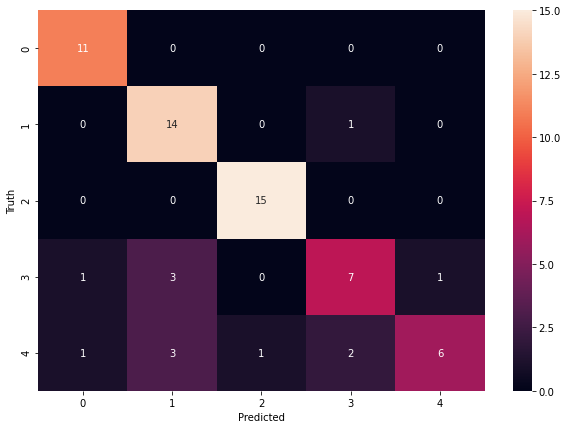

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
class_dict

{'virat kohli': 0,
 'stef curry': 1,
 'sanya mirza': 2,
 'Usain bolt ': 3,
 'Messi': 4}

In [34]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [35]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))